# **World Happiness Index Modeling**

<img src="whr-cover-ico.png" alt="WHI" width="300"/>


**World Happiness Index** is a comprehensive indicator that measures the level of perceived happiness in various countries. It was developed by the Sustainable Development Solutions Network (SDSN), a network for sustainable development solutions operating under the aegis of the United Nations (UN). The data for the index is derived from extensive surveys where respondents rate their lives on a scale from 0 to 10, with 0 indicating the worst possible quality of life and 10 the best.

The ranking is published annually, and the results are used not only to assess the progress of countries towards sustainable development goals but also serve as a tool for policymakers to develop and modify policies aimed at enhancing the overall level of happiness and quality of life.

This index serves as an important diagnostic tool that helps understand how different policies and socio-economic conditions affect the well-being of citizens, thereby contributing to promoting global initiatives aimed at building more harmonious and happier societies.

### **Links to data and the official report website:**
- [Agregated data in csv format](https://worldhappiness.report/data/)
- [Official WHI_2023 Report](https://worldhappiness.report/data/)

### 1. **Importing Libraries**

At the beginning of the project, the necessary libraries were imported:

- **numpy, pandas** - for data manipulation,,
- **seaborn**, **matplotlib**, **plotly** -  for data visualization,
- **pathlib** - for creating file paths,
- **sklearn** - for predictive modeling (linear regression, polynomial regression, random forest, and AdaBoost).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeRegressor

### 2. **Loading Data**

The data was loaded from a CSV file containing panel data.

In [2]:
#paths
csv_path = Path() / "csv"
plots_path = Path() / "plots"

df = pd.read_csv(csv_path / 'WHI.csv')

# Shape of the DataFrame (number of rows, number of columns) before processing
print(df.shape)

df.head()

(2363, 11)


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


### 3. **Pre-processing danych**

*Pre-processing* involved the selection of analyzed variables a priori, renaming columns, removing rows with incomplete data, resetting the index, verifying data type correctness, and ensuring there are no duplicates in the data.

#### **Opis kolumn danych uzywanych w dalszej analizie**:
- **Country** (Country name): Name of the country,
- **Score** (Life ladder): Subjective happiness level of the residents of a given country (survey on a scale from 0 to 10),
- **GDP per capita** (Logged GDP per capita): Logarithm of gross domestic product per capita, expressed in dollars,
- **Social support**: Social support index, referring to the quality and availability of support from family, friends, and others in society (survey on a scale from 0 to 1),
- **Life expectancy** (Healthy life expectancy at birth): Estimated number of years of healthy life at birth,
- **Freedom** (Freedom to make life choices): Level of personal freedom, meaning the ability to make life choices without external constraints (survey on a scale from 0 to 1),
- **Generosity**: Average level of generosity in the country, measured as the difference between the share of people declaring help to others and those who do not,
- **Perceptions of corruption**: Perception of corruption in the country, i.e., how widespread corrupt practices are according to residents (survey on a scale from 0 to 1).

In [3]:
# Data Types Inside Columns and Number of Non-Null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [4]:
# Selection of Columns for Further Analysis
df = df[[
    'Country name',
    'year',
    'Life Ladder',
    'Log GDP per capita',
    'Social support',
    'Healthy life expectancy at birth',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]].reset_index(drop=True)

# Renaming Selected Columns
df = df.rename(columns={
    'Country name':'Country',
    'Life Ladder': 'Score',
    'Log GDP per capita': 'GDP per capita',
    'Healthy life expectancy at birth': 'Life expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Corruption'
})

df.head()

,Country,year,Score,GDP per capita,Social support,Life expectancy,Freedom,Generosity,Corruption
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776


In [5]:
# Checking for ‘NaN’ - Empty Cells in Columns
print(df.isnull().sum())

# Counting the Number of Rows with Missing Values
num_rows_with_nan = df[df.isnull().any(axis=1)].shape[0]
print(f'Number of rows with at least one NaN value: {num_rows_with_nan}.')

Country              0
year                 0
Score                0
GDP per capita      28
Social support      13
Life expectancy     63
Freedom             36
Generosity          81
Corruption         125
dtype: int64
Number of rows with at least one NaN value: 260.


In [6]:
# Removing Rows with at Least One NaN Value
df = df.dropna()

In [7]:
# Checking for Duplicates in the Data
duplicates_num = df.duplicated().sum()

if duplicates_num == 0:
    print('There are no duplicates in the data.')
else:
    print('There are', duplicates_num, 'duplicates.')

There are no duplicates in the data.


In [8]:
# Shape of the DataFrame (Number of Rows, Number of Columns) After Processing
print(df.shape)

# Data Types Inside Columns
df.info()

# Displaying Descriptive Statistics for Selected Columns
selected_columns = ['Score', 'GDP per capita', 'Social support', 'Life expectancy', 'Freedom', 'Generosity', 'Corruption']
df[selected_columns].describe().T

(2103, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 2103 entries, 0 to 2362
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          2103 non-null   object 
 1   year             2103 non-null   int64  
 2   Score            2103 non-null   float64
 3   GDP per capita   2103 non-null   float64
 4   Social support   2103 non-null   float64
 5   Life expectancy  2103 non-null   float64
 6   Freedom          2103 non-null   float64
 7   Generosity       2103 non-null   float64
 8   Corruption       2103 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 164.3+ KB


,count,mean,std,min,25%,50%,75%,max
Score,2103.0,5.465162,1.135956,2.179,4.612,5.432,6.2885,7.971
GDP per capita,2103.0,9.354218,1.154002,5.527,8.465,9.496,10.3140,11.676
Social support,2103.0,0.806939,0.123662,0.290,0.736,0.834,0.9050,0.987
Life expectancy,2103.0,63.268982,6.995093,6.720,58.660,65.075,68.6775,74.600
Freedom,2103.0,0.748899,0.138700,0.258,0.659,0.769,0.8595,0.985
Generosity,2103.0,0.000141,0.162105,-0.340,-0.110,-0.021,0.0925,0.700
Corruption,2103.0,0.747160,0.183664,0.035,0.691,0.800,0.8680,0.983


- **Distribution of Features**:

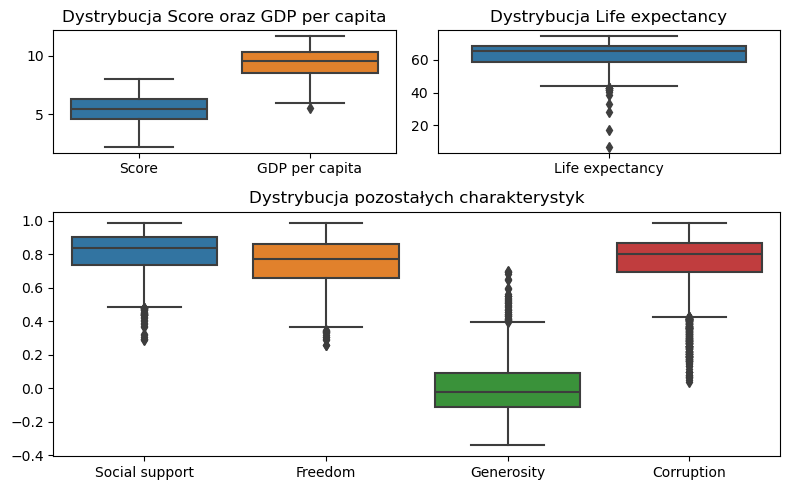

In [9]:
# Creating the Figure and Grid
fig = plt.figure(figsize=(8, 5))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 2])

# Distribution of ‘Score’ and ‘GDP per capita’
ax1 = fig.add_subplot(gs[0, 0])
list_features_1 = ['Score', 'GDP per capita']
sns.boxplot(data=df[list_features_1], ax=ax1)
ax1.set_title('Score & GDP per capita distribution')

# Distribution of 'Life expectancy'
ax2 = fig.add_subplot(gs[0, 1])
list_features_2 = ['Life expectancy']
sns.boxplot(data=df[list_features_2], ax=ax2)
ax2.set_title('Life expectancy distribution')

# Distribution of the rest
ax3 = fig.add_subplot(gs[1, :])
rest_list_features = ['Social support', 'Freedom', 'Generosity', 'Corruption']
sns.boxplot(data=df[rest_list_features], ax=ax3)
ax3.set_title('Distribution of the rest')

plt.tight_layout()
plt.savefig(plots_path / 'distribution.svg')
plt.show()

Based on the analysis of the WHI data, it can be concluded that the global perception of quality of life is moderately positive, with an average happiness score of 5.465. The range of scores from 2.179 to 7.971 indicates significant variation in happiness levels across different countries. Similar conclusions can be drawn for the other variables.

The average value of social support is 0.807, suggesting that strong support networks exist in many parts of the world. Life expectancy has an average value of 63.27 years, with the highest value being 74.6 years, highlighting disparities in access to healthcare. The average personal freedom is 0.749, which may indicate a generally high level of personal freedom in the analyzed countries. The average generosity close to zero with a wide range of variability shows that generosity is perceived and practiced differently in various societies. The perception of corruption has an average of 0.747, suggesting that corruption is highly visible to the public in many regions.

- **Histograms and bar charts depicting the relationships between subsequent columns**:

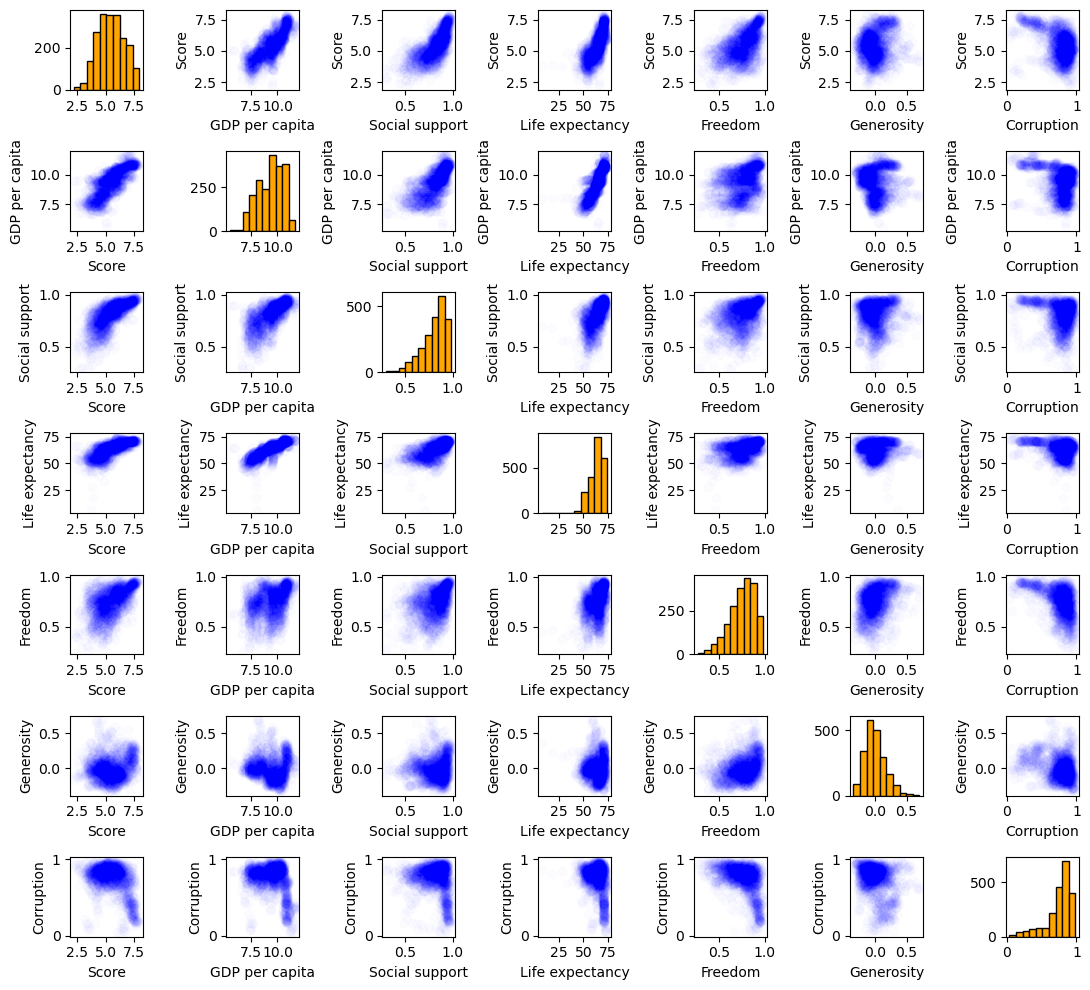

In [10]:
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=len(selected_columns), figsize=(11, 10))

for i, column1 in enumerate(selected_columns):
    for j, column2 in enumerate(selected_columns):
        if i == j:
            axes[i, j].hist(df[column1], bins=10, color='orange', edgecolor='black')
        else:
            axes[i, j].scatter(df[column2], df[column1], color='blue', alpha=0.01)
            axes[i, j].set_xlabel(column2)
            axes[i, j].set_ylabel(column1)

plt.tight_layout()
plt.savefig(plots_path / 'dependencies_characteristics.svg')
plt.show()

- **Correlation**:

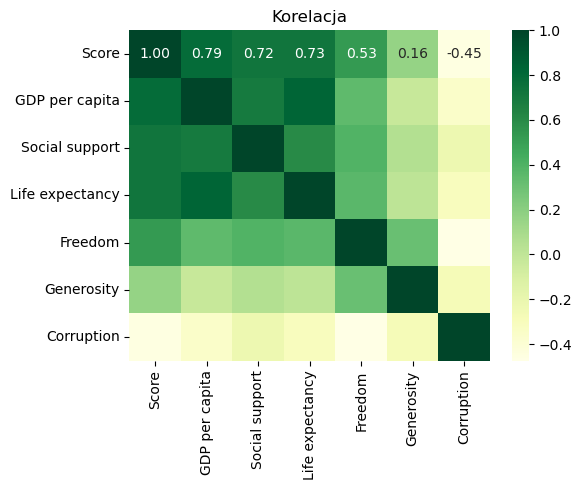

In [11]:
# Usunięcie niepotrzebnych na heatmap kolumn
df_corr = df[selected_columns]
corr_matrix = df_corr.corr()

# Ustawienia heatmap
plt.figure(figsize=(6, 5))
plt.title("Korelacja")
sns.heatmap(corr_matrix, cmap='YlGn', annot=True, fmt=".2f")
plt.tight_layout()
plt.savefig(plots_path / 'korelacja.svg')
plt.show()

- Wysoki wynik koreluje pozytywnie z wysokim PKB na mieszkańca, wsparciem społecznym, długością życia i wolnością, a negatywnie z korupcją.
- PKB na mieszkańca jest silnie powiązany z PKB, długością życia i wsparciem społecznym, co sugeruje, że wyższy poziom ekonomiczny sprzyja lepszym warunkom życia. Wolność i wsparcie społeczne są również istotne dla dobrobytu, choć w mniejszym stopniu niż pozostałe.
- Korupcja ma negatywny wpływ na wszystkie główne wskaźniki, co podkreśla znaczenie transparentności i rządów prawa dla dobrobytu społeczeństwa.

### 4. **Wizualizacje pomocne w zrozumieniu danych**

#### **WHI w 2023 roku**:

In [12]:
# Wyodrębnienie danych dla roku 2023
df_2023 = df[df['year'] == 2023]

# Sortowanie danych od najwyższych wyników 'Life Ladder'
df_2023 = df_2023.sort_values(by='Score', ascending=False)

# Zresetowanie indeksu
df_2023 = df_2023.reset_index(drop=True)

# Wyświetlenie pierwszych kilku wierszy dataframe
df_2023.head()

,Country,year,Score,GDP per capita,Social support,Life expectancy,Freedom,Generosity,Corruption
0,Finland,2023,7.699,10.808,0.947,71.3,0.943,-0.001,0.185
1,Iceland,2023,7.562,10.934,0.979,72.1,0.918,0.299,0.697
2,Denmark,2023,7.504,10.996,0.916,71.5,0.923,0.089,0.184
3,Costa Rica,2023,7.384,10.021,0.875,70.0,0.933,-0.067,0.767
4,Netherlands,2023,7.255,10.977,0.915,71.7,0.847,0.223,0.424


- **Wykres słupkowy prezentujący wszystkie analizowane kraje w 2023 roku**:

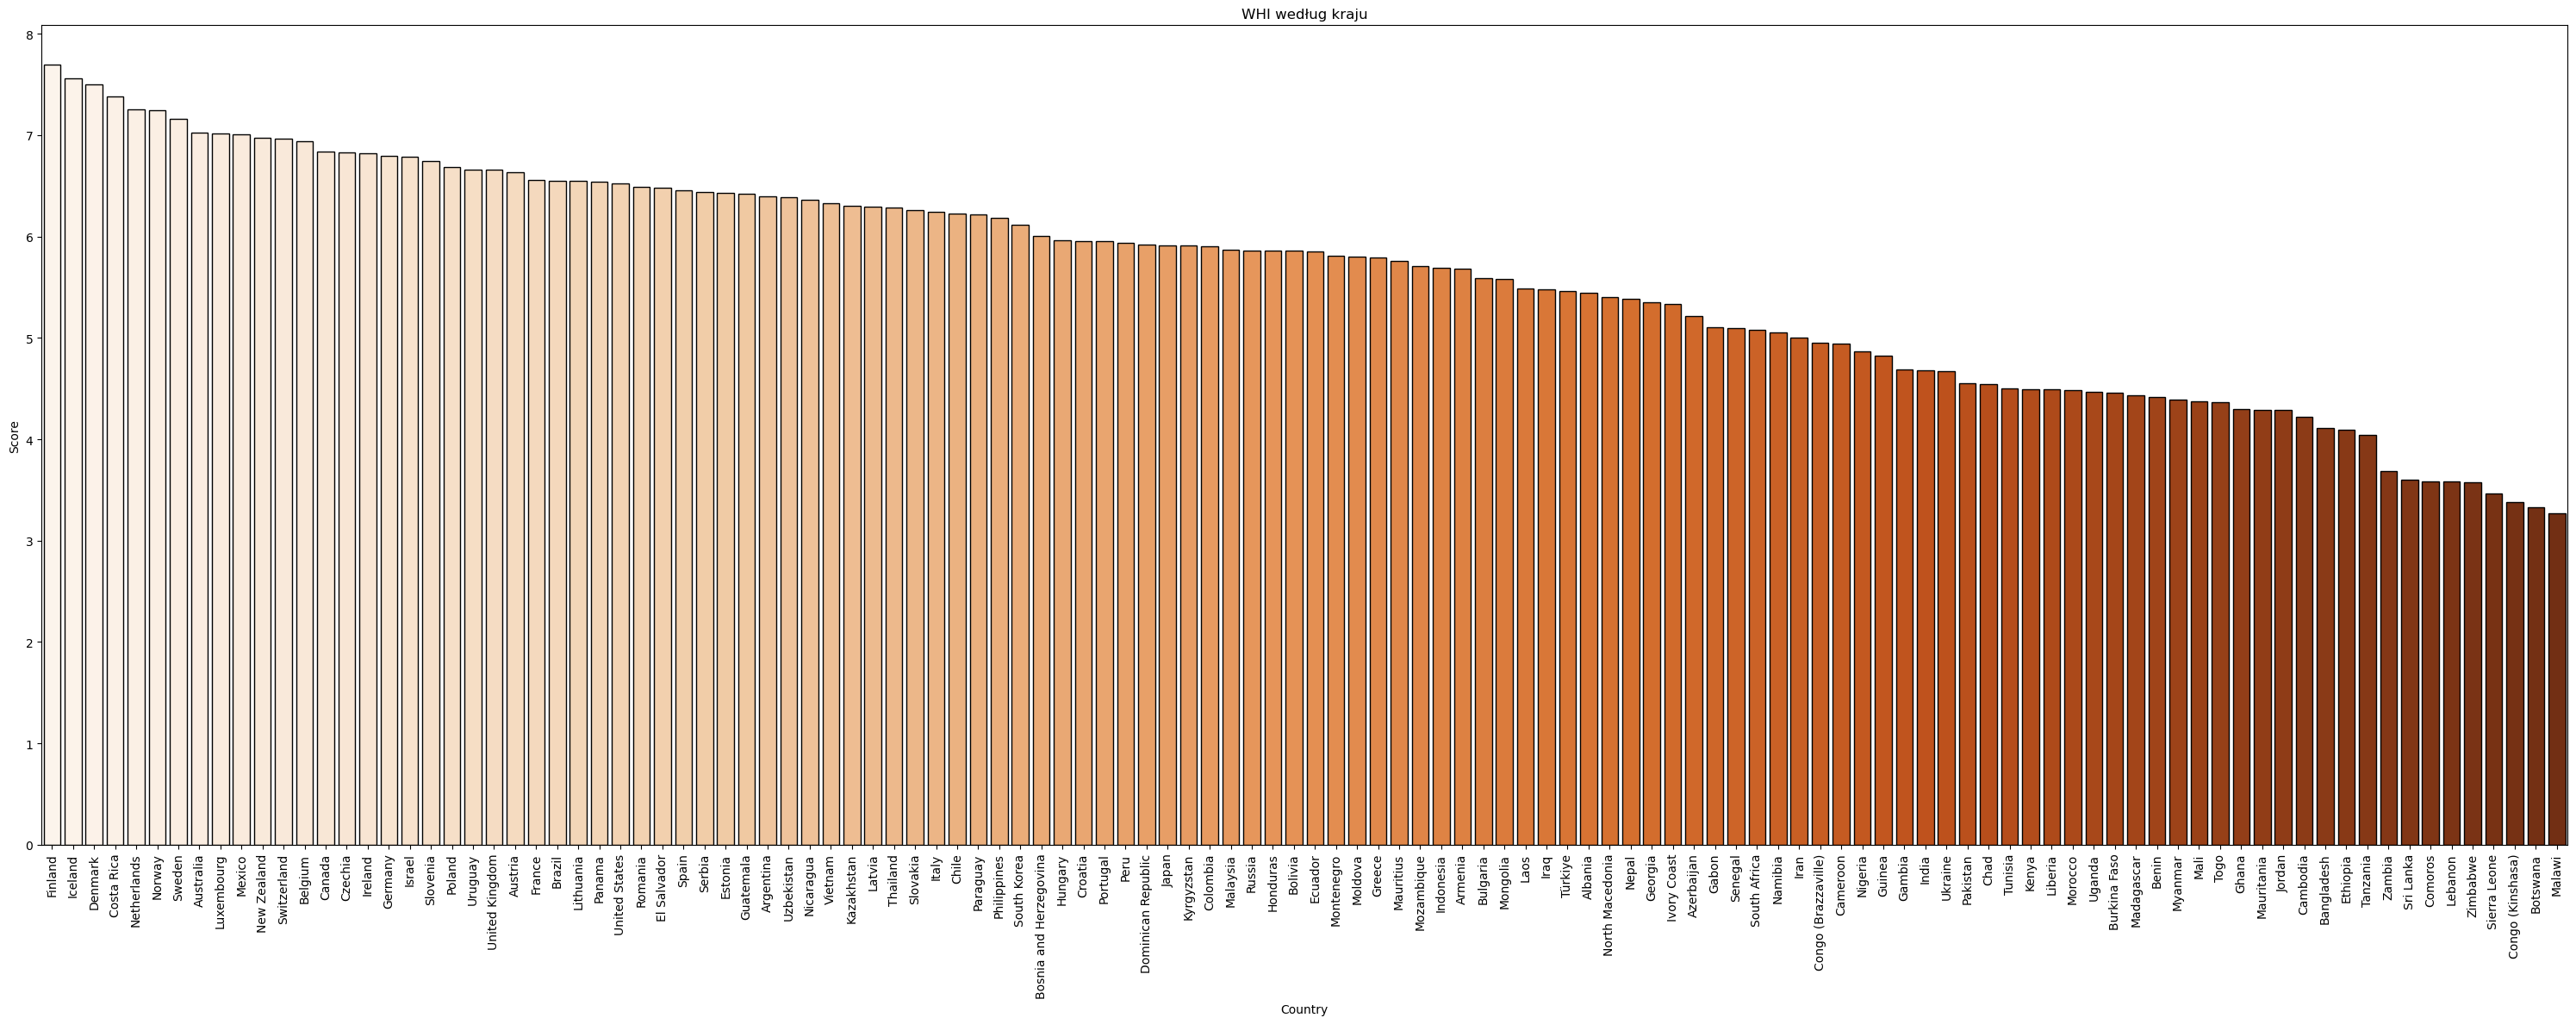

In [13]:
plt.figure(figsize=(30,12))
sns.barplot(x='Country', y='Score', data=df_2023, palette='Oranges', edgecolor='black')
plt.xticks(rotation=90)
plt.title('WHI według kraju')
plt.tight_layout()
plt.savefig(plots_path / 'whi_wszystkie_kraje.svg')
plt.show()

- **Wykres przedstawiający najszczęśliwsze i najmniej szczęśliwe kraje w 2023 roku**:

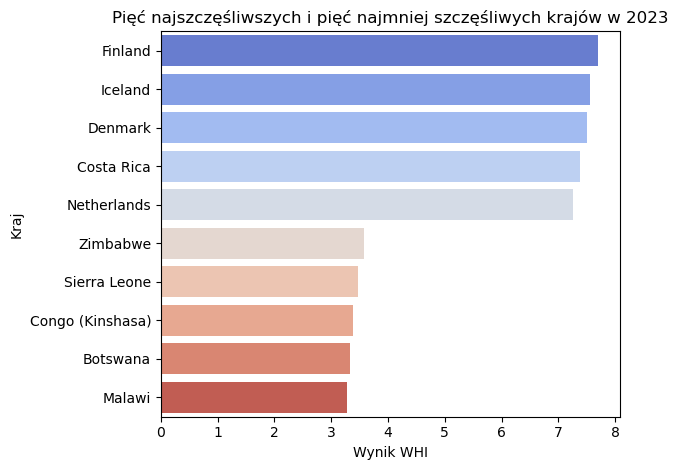

In [14]:
df_2023_max_min = df_2023[(df_2023.loc[:, "Score"] > 7.25) | (df_2023.loc[:, "Score"] < 3.58)]
sns.barplot(x = "Score", y = "Country", data=df_2023_max_min, palette = "coolwarm")
plt.title("Pięć najszczęśliwszych i pięć najmniej szczęśliwych krajów w 2023")
plt.xlabel('Wynik WHI')
plt.ylabel('Kraj')
plt.tight_layout()
plt.savefig(plots_path / 'whi_najwyzsze_najnizsze.svg')
plt.show()

#### **Dane z wszystkich lat badania**:

- **Dane dla Polski na przestrzeni lat**:

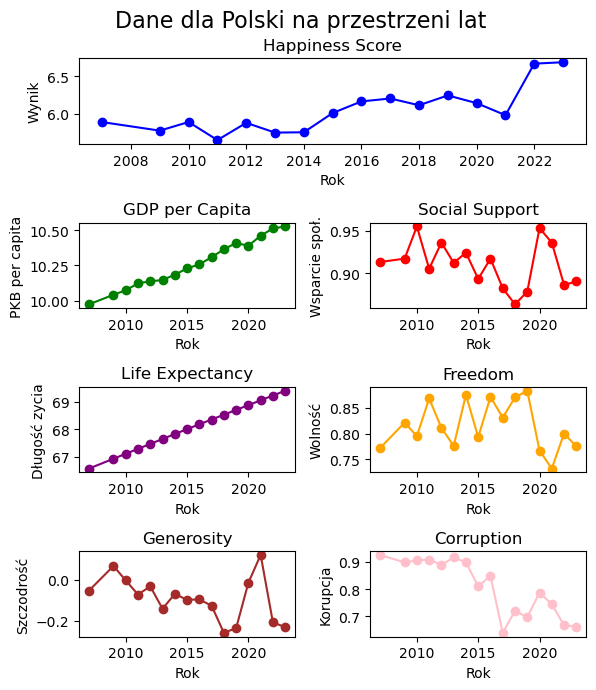

In [15]:
poland = df[df['Country']=='Poland'].reset_index(drop=True)

fig = plt.figure(figsize=(6, 7))

# Duży wykres
ax1 = plt.subplot2grid((4, 2), (0, 0), colspan=2, rowspan=1)
ax1.plot(poland['year'], poland['Score'], marker='o', color='blue')
ax1.set_title('Happiness Score')
ax1.set_xlabel('Rok')
ax1.set_ylabel('Wynik')

# Mniejsze wykresy
ax2 = plt.subplot2grid((4, 2), (1, 0))
ax2.plot(poland['year'], poland['GDP per capita'], marker='o', color='green')
ax2.set_title('GDP per Capita')
ax2.set_xlabel('Rok')
ax2.set_ylabel('PKB per capita')

ax3 = plt.subplot2grid((4, 2), (1, 1))
ax3.plot(poland['year'], poland['Social support'], marker='o', color='red')
ax3.set_title('Social Support')
ax3.set_xlabel('Rok')
ax3.set_ylabel('Wsparcie społ.')

ax4 = plt.subplot2grid((4, 2), (2, 0))
ax4.plot(poland['year'], poland['Life expectancy'], marker='o', color='purple')
ax4.set_title('Life Expectancy')
ax4.set_xlabel('Rok')
ax4.set_ylabel('Długość zycia')

ax5 = plt.subplot2grid((4, 2), (2, 1))
ax5.plot(poland['year'], poland['Freedom'], marker='o', color='orange')
ax5.set_title('Freedom')
ax5.set_xlabel('Rok')
ax5.set_ylabel('Wolność')

ax6 = plt.subplot2grid((4, 2), (3, 0))
ax6.plot(poland['year'], poland['Generosity'], marker='o', color='brown')
ax6.set_title('Generosity')
ax6.set_xlabel('Rok')
ax6.set_ylabel('Szczodrość')

ax7 = plt.subplot2grid((4, 2), (3, 1))
ax7.plot(poland['year'], poland['Corruption'], marker='o', color='pink')
ax7.set_title('Corruption')
ax7.set_xlabel('Rok')
ax7.set_ylabel('Korupcja')

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle('Dane dla Polski na przestrzeni lat', fontsize=16)
plt.savefig(plots_path / 'dane_polska.svg')
plt.show()

W analizowanym okresie Polska doświadczyła ogólnej poprawy w wielu kluczowych wskaźnikach, takich jak PKB na osobę, oczekiwana długość życia i wskaźnik szczęścia. Chociaż wsparcie społeczne i wolność osobista były stosunkowo stabilne, hojność i postrzeganie korupcji wykazały większe wahania. Ogólnie wyniki te sugerują, że warunki życia w Polsce stopniowo się poprawiają, chociaż pewne obszary wymagają dalszej uwagi.

- **Interaktywna mapka**:

In [16]:
# Dodanie kolumny z wszystkimi wynikami Score wraz z rokiem
df['Year_Score'] = df['year'].astype(str) + ': ' + df['Score'].astype(str)

# Sortowanie wyników od najnowszych do najstarszych przed łączeniem
df['All Scores'] = df.groupby('Country')['Year_Score'].transform(lambda x: '<br>'.join(sorted(x, reverse=True)))

# Sortowanie danych według roku w kolejności malejącej
df_sorted = df.sort_values(by='year', ascending=False)

# Usunięcie duplikatów, aby zachować tylko najnowsze wyniki dla każdego kraju
df_latest = df_sorted.drop_duplicates(subset=['Country'])

# Kolory mapki
custom_color_scale = [(0.0, 'red'), 
                      (0.5, 'yellow'), 
                      (1.0, 'green')
                      ]

# Dane do mapki używając df najnowszych wyników
fig = px.choropleth(df_latest, locations='Country', 
                    locationmode='country names',
                    color='Score', 
                    hover_name='Country',
                    hover_data={'All Scores': True},
                    color_continuous_scale=custom_color_scale
                    )

# Ustawienie tytułu i wycentrowanie go
fig.update_layout(title_text='World Happiness Index', title_x=0.5)
fig.show()

### 5. **Modelowanie predykcyjne**

Zaimplementowano cztery modele regresji:

- Regresja wieloraka,
- Regresja wielomianowa,
- Las losowy,
- AdaBoost.

Każdy z powyższych modeli został przetestowany pod kątem błędu średniokwadratowego (MSE) oraz współczynnika determinacji R2. W tym celu w pierwszej kolejności podzielono zmienne na zmienną objaśnianą Y, za którą obrano poziom szczęścia oraz zmienne objaśniające oznaczone przez X (wszystkie pozostałe zmienne). Następnie dane podzielono na zbiory uczące oraz testowe.

In [17]:
# Definicja cech i zmiennej celu
features = ['GDP per capita', 'Social support', 'Life expectancy', 
            'Freedom', 'Generosity', 'Corruption']
target = 'Score'

# Przygotowanie danych
X = df[features]
Y = df[target]

In [18]:
# Podział danych na zestawy treningowe i testowe
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
# Funkcja do tworzenia wykresów dane rzeczwiste vs wyniki modelu
def plot_actual_vs_predicted(ax, y_true, y_pred, model_name, mse, r2, color):
    ax.scatter(y_true, y_pred, alpha=0.5, color=color, label='Predykcja modelu')
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Dane rzeczywiste')
    ax.set_ylabel('Predykcja modelu')
    ax.legend()
    mse_text = f'MSE: {mse:.2f}'
    r2_text = f'R^2: {r2:.2f}'
    ax.text(0.86, 0.05, mse_text, transform=ax.transAxes, verticalalignment='top', fontsize=9, color=color)
    ax.text(0.86, 0.10, r2_text, transform=ax.transAxes, verticalalignment='top', fontsize=9, color=color)

#### **MODEL 1: Regresja wieloraka (Multiple Linear Regression)**

Regresja wieloraka to technika statystyczna, która modeluje zależność między jedną zmienną zależną a dwoma lub więcej zmiennymi niezależnymi. Umożliwia ocenę, w jaki sposób różne zmienne niezależne przyczyniają się do zmiennej zależnej. Jest stosowana, gdy chcemy zrozumieć wpływ kilku różnych czynników na wynik i znajdować wzorce w danych.

W modelu wykorzystano walidację krzyżową, aby zapewnić jego obiektywną ocenę i lepszą generalizację poprzez wykorzystanie każdej dostępnej próbki danych do zarówno treningu, jak i testowania modelu, co minimalizuje ryzyko przeuczenia i zwiększa wiarygodność wyników.

In [20]:
# Regresja wieloraka

# Inicjalizacja modelu i trenowanie na danych treningowych
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)

# Walidacja Krzyżowa
cv_linear = cross_val_score(estimator = mlr_model, X = X_train, y = Y_train, cv = 10)
std_cv_score = np.std(cv_linear)

Y_train_pred_mlr = mlr_model.predict(X_train)
Y_test_pred_mlr = mlr_model.predict(X_test)

# Obliczanie dopasowania modelu do danych
residuals_mlr = Y_test - Y_test_pred_mlr
mlr_train_mse = mean_squared_error(Y_train, Y_train_pred_mlr)
mlr_test_mse = mean_squared_error(Y_test, Y_test_pred_mlr)
mlr_train_r2 = r2_score(Y_train, Y_train_pred_mlr)
mlr_test_r2 = r2_score(Y_test, Y_test_pred_mlr)

print("Wyniki CV: ", cv_linear)
print("Średnia wartość CV: ", cv_linear.mean())
print("Odchylenie standardowe wyników CV:", std_cv_score)

Wyniki CV:  [0.67486123 0.70012399 0.79196007 0.72598963 0.78170096 0.76219964
 0.75171184 0.76505392 0.76413341 0.75527564]
Średnia wartość CV:  0.7473010329093024
Odchylenie standardowe wyników CV: 0.03465352796444072


#### **MODEL 2: Regresja wielomianowa (Polynomial Regression)**

Regresja wielomianowa to rozszerzenie regresji liniowej, które pozwala na modelowanie zależności nieliniowych poprzez podnoszenie zmiennych niezależnych do wyższych potęg. Jest przydatna, gdy relacje między zmienną zależną a niezależnymi wydają się bardziej złożone niż prosta linia.

Wielomian trzeciego stopnia generował lepsze wyniki niż wielomian stopnia drugiego – stąd jego wybór do dalszej analizy.

In [21]:
# Regresja wielomianowa

# Tworzenie obiektu PolynomialFeatures do generowania cech wielomianowych
poly = PolynomialFeatures(degree=3, include_bias=False)

# Transformacja cech wejściowych na cechy wielomianowe
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y, test_size=0.2, random_state=42)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train_poly)

# Walidacja krzyżowa
cv_poly = cross_val_score(estimator=poly_model, X=X_train_poly, y=Y_train_poly, cv=10)
std_cv_poly = np.std(cv_poly)

Y_train_pred_poly = poly_model.predict(X_train_poly)
Y_test_pred_poly = poly_model.predict(X_test_poly)
poly_train_mse = mean_squared_error(Y_train_poly, Y_train_pred_poly)
poly_test_mse = mean_squared_error(Y_test_poly, Y_test_pred_poly)
poly_train_r2 = r2_score(Y_train_poly, Y_train_pred_poly)
poly_test_r2 = r2_score(Y_test_poly, Y_test_pred_poly)

print("Wyniki CV: ", cv_poly)
print("Średnia wartość CV: ", cv_poly.mean())
print("Odchylenie standardowe wyników CV:", std_cv_poly)

Wyniki CV:  [0.7128189  0.76356289 0.7991967  0.77083134 0.80062102 0.80384601
 0.61957922 0.74467442 0.7758161  0.76740281]
Średnia wartość CV:  0.7558349406261181
Odchylenie standardowe wyników CV: 0.052487456854396555


#### **MODEL 3: Las losowy (Random Forest)**

Las losowy to metoda uczenia maszynowego oparta na agregacji wielu drzew decyzyjnych do prognozowania wyniku. Każde drzewo jest trenowane na nieco innej próbce danych, co sprawia, że model jest odporniejszy na przeuczenie i lepiej generalizuje na nowe dane od pojedynczego drzewa decyzyjnego.

In [22]:
# Normalizacja cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Normalizacja cech została przeprowadzona przy użyciu StandardScaler z biblioteki scikit-learn. Normalizacja przekształca dane tak, aby miały średnią wartość 0 i odchylenie standardowe 1. Jest to ważny krok, aby zapewnić, że wszystkie cechy mają porównywalny zakres wartości, co pomaga w poprawie efektywności modeli maszynowego uczenia się.

In [23]:
# Definiowanie siatki hiperparametrów (bardziej restrykcyjne wartości)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [4, 6, 8],
    'bootstrap': [True]
}

Siatka hiperparametrów została zdefiniowana w celu znalezienia najlepszych parametrów dla modelu RandomForestRegressor. Zakresy wartości dla różnych parametrów, takich jak liczba drzew w lesie (n_estimators), maksymalna liczba cech do rozważenia przy podziale (max_features), maksymalna głębokość drzewa (max_depth), minimalna liczba próbek potrzebnych do podziału węzła (min_samples_split) oraz minimalna liczba próbek w liściu (min_samples_leaf), zostały określone.

In [24]:
# Inicjalizacja modelu
rf_model = RandomForestRegressor(random_state=42)

Inicjalizowany jest model RandomForestRegressor z ustawionym parametrem random_state dla zapewnienia powtarzalności wyników.

In [25]:
# Strojenie hiperparametrów za pomocą GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=0)
grid_search.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [100, 200, 300]})

GridSearchCV jest używany do przeszukiwania najlepszych hiperparametrów. Przeszukiwanie odbywa się poprzez wypróbowanie wszystkich kombinacji zdefiniowanych w param_grid, z użyciem 10-krotnej walidacji krzyżowej (cv=10). Parametr n_jobs=-1 oznacza, że wszystkie dostępne procesory będą używane do obliczeń, a verbose=2 ustawia poziom szczegółowości wyjścia.

In [26]:
# Najlepsze parametry
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Inicjalizacja modelu z najlepszymi hiperparametrami
rf_model_best = RandomForestRegressor(**best_params, random_state=42)
rf_model_best.fit(X_train_scaled, Y_train)

# Predykcje
Y_train_pred_rf = rf_model_best.predict(X_train_scaled)
Y_test_pred_rf = rf_model_best.predict(X_test_scaled)

# Ocena modelu
rf_train_mse = mean_squared_error(Y_train, Y_train_pred_rf)
rf_test_mse = mean_squared_error(Y_test, Y_test_pred_rf)
rf_train_r2 = r2_score(Y_train, Y_train_pred_rf)
rf_test_r2 = r2_score(Y_test, Y_test_pred_rf)

Best Parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [27]:
# Wyniki walidacji krzyżowej z GridSearchCV
cv_results_rf = grid_search.cv_results_

# Tworzenie DataFrame z wynikami
cv_results_df_rf = pd.DataFrame(cv_results_rf)

# Wyświetlanie najważniejszych kolumn
cv_results_summary_rf = cv_results_df_rf[['mean_test_score', 'std_test_score']].sort_values(by='mean_test_score')
print('Średnie wartości CV:\n', cv_results_summary_rf.mean())

Średnie wartości CV:
 mean_test_score    0.811321
std_test_score     0.026753
dtype: float64


#### **MODEL 4: Adaptive Boosting (AdaBoost)**

Adaptive Boosting, znany również jako AdaBoost, jest jedną z pionierskich technik wzmacniania (boosting) w dziedzinie uczenia maszynowego, której głównym celem jest zwiększenie wydajności modeli poprzez sekwencyjne trenowanie serii tzw. słabych klasyfikatorów. Każdy kolejny klasyfikator w serii jest skonstruowany tak, aby skorygować błędy wykonane przez jego poprzedników, co prowadzi do stopniowego wzmacniania ogólnej mocy predykcyjnej modelu.

In [28]:
# Definiowanie podstawowego estymatora
base_estimator = DecisionTreeRegressor()

# Definiowanie modelu AdaBoost
ada_boost_model = AdaBoostRegressor(estimator=base_estimator, random_state=42)

# Definiowanie siatki hyperparametrów
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [2, 4, 6]
}

# Przeszukiwanie siatki hyperparametrów za pomocą GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Trenowanie modelu GridSearchCV
grid_search.fit(X_train, Y_train)

# Uzyskanie najlepszego modelu
best_model = grid_search.best_estimator_

# Predykcje za pomocą najlepszego modelu
Y_train_pred_ada = best_model.predict(X_train)
Y_test_pred_ada = best_model.predict(X_test)

# Ocena najlepszego modelu
ada_train_mse = mean_squared_error(Y_train, Y_train_pred_ada)
ada_test_mse = mean_squared_error(Y_test, Y_test_pred_ada)
ada_train_r2 = r2_score(Y_train, Y_train_pred_ada)
ada_test_r2 = r2_score(Y_test, Y_test_pred_ada)

# Wyświetlanie wyników
print("Najlepsze parametry:", grid_search.best_params_)

Najlepsze parametry: {'estimator__max_depth': 6, 'learning_rate': 1, 'n_estimators': 200}


In [29]:
# Wyniki walidacji krzyżowej z GridSearchCV
cv_results_ada = grid_search.cv_results_

# Tworzenie DataFrame z wynikami
cv_results_df_ada = pd.DataFrame(cv_results_ada)

# Wyświetlanie najważniejszych kolumn
cv_results_summary_ada = cv_results_df_ada[['mean_test_score', 'std_test_score']].sort_values(by='mean_test_score')
print('Średnie wartości CV:\n', cv_results_summary_ada.mean())

Średnie wartości CV:
 mean_test_score    0.768256
std_test_score     0.027073
dtype: float64


### 6. **Wyniki wszystkich wykorzystanych modeli**
- **Wykresy dopasowania wyników modeli do danych rzeczywistych**:

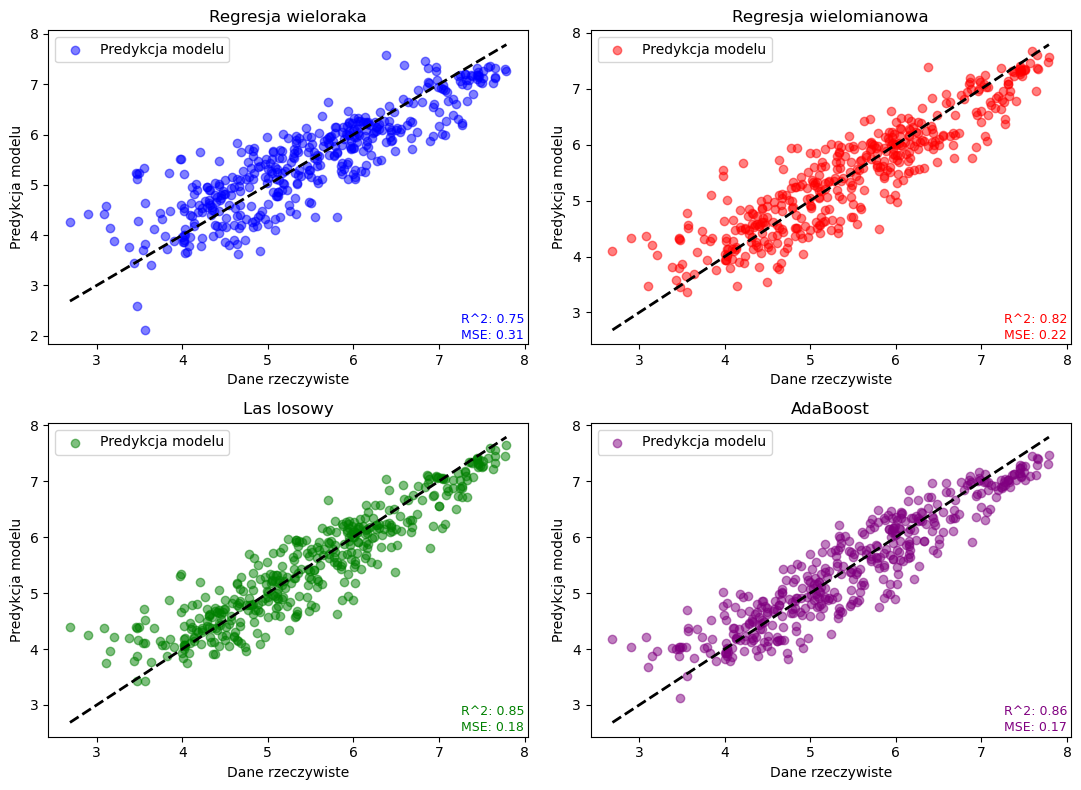

In [30]:
# Create a 2x2 grid for plots
fig, axes = plt.subplots(2, 2, figsize=(11, 8))

# Plot each model in the grid
plot_actual_vs_predicted(axes[0, 0], Y_test, Y_test_pred_mlr, 'Regresja wieloraka', mlr_test_mse, mlr_test_r2, 'blue')
plot_actual_vs_predicted(axes[0, 1], Y_test_poly, Y_test_pred_poly, 'Regresja wielomianowa', poly_test_mse, poly_test_r2, 'red')
plot_actual_vs_predicted(axes[1, 0], Y_test, Y_test_pred_rf, 'Las losowy', rf_test_mse, rf_test_r2, 'green')
plot_actual_vs_predicted(axes[1, 1], Y_test, Y_test_pred_ada, 'AdaBoost', ada_test_mse, ada_test_r2, 'purple')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig(plots_path / 'all_models_comparison.svg')
plt.show()

- **Tabela zawierająca wszystkie otrzymane wyniki**:

In [31]:
# Utwórz listę z danymi
data = {
    "Model": ["Regresja wieloraka", "Regresja wielomianowa", "Las losowy", "AdaBoost"],
    "MSE treningowe": [mlr_train_mse, poly_train_mse, rf_train_mse, ada_train_mse],
    "MSE testowe": [mlr_test_mse, poly_test_mse, rf_test_mse, ada_test_mse],
    "R2 treningowe": [mlr_train_r2, poly_train_r2, rf_train_r2, ada_train_r2],
    "R2 testowe": [mlr_test_r2, poly_test_r2, rf_test_r2, ada_test_r2]
}

# Utwórz ramkę danych pandas
results = pd.DataFrame(data)

results

,Model,MSE treningowe,MSE testowe,R2 treningowe,R2 testowe
0,Regresja wieloraka,0.321784,0.305350,0.753924,0.749375
1,Regresja wielomianowa,0.248776,0.222160,0.809755,0.817655
2,Las losowy,0.105150,0.178880,0.919589,0.853179
3,AdaBoost,0.109352,0.174123,0.916376,0.857083


- **Krzywe uczenia wszystkich modeli**:

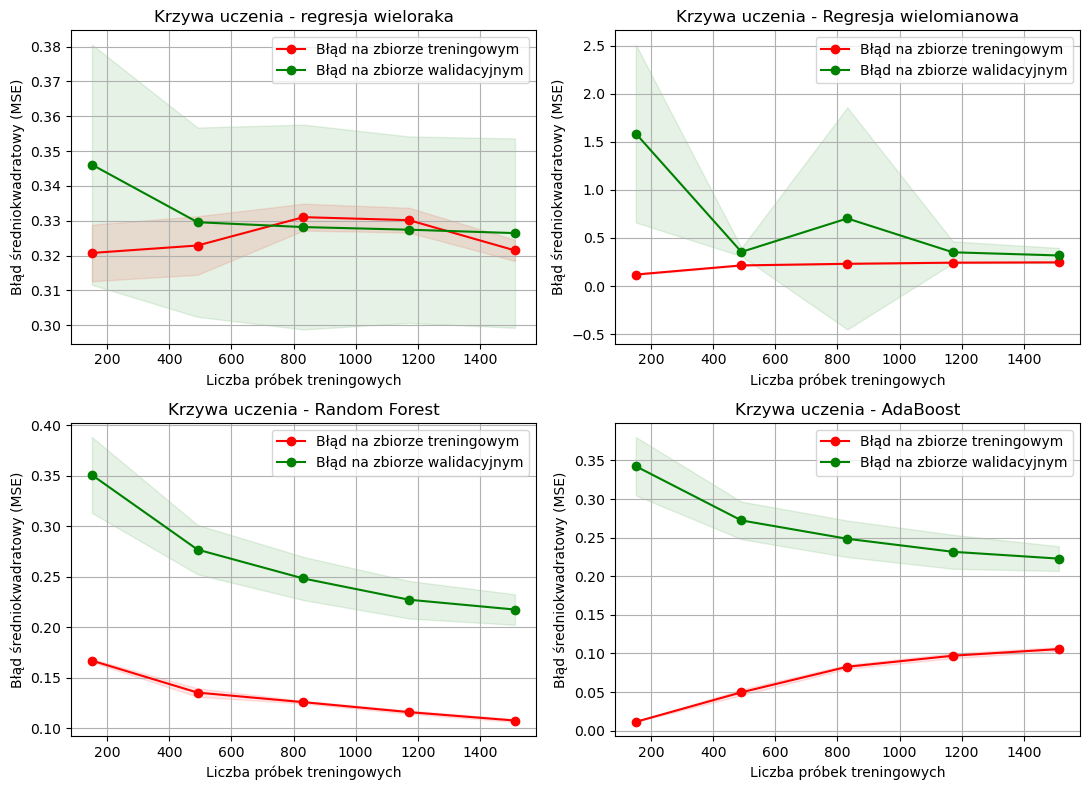

In [32]:
# Calculate learning curves for each model
train_sizes_mr, train_scores_mr, test_scores_mr = learning_curve(mlr_model, X_train, Y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
train_sizes_poly, train_scores_poly, test_scores_poly = learning_curve(poly_model, X_train_poly, Y_train_poly, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(rf_model_best, X_train_scaled, Y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
train_sizes_ada, train_scores_ada, test_scores_ada = learning_curve(best_model, X_train_scaled, Y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Mean and standard deviation of scores
train_scores_mean_mr = -train_scores_mr.mean(axis=1)
train_scores_std_mr = train_scores_mr.std(axis=1)
test_scores_mean_mr = -test_scores_mr.mean(axis=1)
test_scores_std_mr = test_scores_mr.std(axis=1)

train_scores_mean_poly = -train_scores_poly.mean(axis=1)
train_scores_std_poly = train_scores_poly.std(axis=1)
test_scores_mean_poly = -test_scores_poly.mean(axis=1)
test_scores_std_poly = test_scores_poly.std(axis=1)

train_scores_mean_rf = -train_scores_rf.mean(axis=1)
train_scores_std_rf = train_scores_rf.std(axis=1)
test_scores_mean_rf = -test_scores_rf.mean(axis=1)
test_scores_std_rf = test_scores_rf.std(axis=1)

train_scores_mean_ada = -train_scores_ada.mean(axis=1)
train_scores_std_ada = train_scores_ada.std(axis=1)
test_scores_mean_ada = -test_scores_ada.mean(axis=1)
test_scores_std_ada = test_scores_ada.std(axis=1)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(11, 8))

# Multiple Linear Regression
axes[0, 0].set_title("Krzywa uczenia - regresja wieloraka")
axes[0, 0].set_xlabel("Liczba próbek treningowych")
axes[0, 0].set_ylabel("Błąd średniokwadratowy (MSE)")
axes[0, 0].grid()
axes[0, 0].fill_between(train_sizes_mr, train_scores_mean_mr - train_scores_std_mr,
                        train_scores_mean_mr + train_scores_std_mr, alpha=0.1, color="r")
axes[0, 0].plot(train_sizes_mr, train_scores_mean_mr, 'o-', color="r", label="Błąd na zbiorze treningowym")
axes[0, 0].fill_between(train_sizes_mr, test_scores_mean_mr - test_scores_std_mr,
                        test_scores_mean_mr + test_scores_std_mr, alpha=0.1, color="g")
axes[0, 0].plot(train_sizes_mr, test_scores_mean_mr, 'o-', color="g", label="Błąd na zbiorze walidacyjnym")
axes[0, 0].legend(loc="best")

# Polynomial Regression
axes[0, 1].set_title("Krzywa uczenia - Regresja wielomianowa")
axes[0, 1].set_xlabel("Liczba próbek treningowych")
axes[0, 1].set_ylabel("Błąd średniokwadratowy (MSE)")
axes[0, 1].grid()
axes[0, 1].fill_between(train_sizes_poly, train_scores_mean_poly - train_scores_std_poly,
                        train_scores_mean_poly + train_scores_std_poly, alpha=0.1, color="r")
axes[0, 1].plot(train_sizes_poly, train_scores_mean_poly, 'o-', color="r", label="Błąd na zbiorze treningowym")
axes[0, 1].fill_between(train_sizes_poly, test_scores_mean_poly - test_scores_std_poly,
                        test_scores_mean_poly + test_scores_std_poly, alpha=0.1, color="g")
axes[0, 1].plot(train_sizes_poly, test_scores_mean_poly, 'o-', color="g", label="Błąd na zbiorze walidacyjnym")
axes[0, 1].legend(loc="best")

# Random Forest
axes[1, 0].set_title("Krzywa uczenia - Random Forest")
axes[1, 0].set_xlabel("Liczba próbek treningowych")
axes[1, 0].set_ylabel("Błąd średniokwadratowy (MSE)")
axes[1, 0].grid()
axes[1, 0].fill_between(train_sizes_rf, train_scores_mean_rf - train_scores_std_rf,
                        train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color="r")
axes[1, 0].plot(train_sizes_rf, train_scores_mean_rf, 'o-', color="r", label="Błąd na zbiorze treningowym")
axes[1, 0].fill_between(train_sizes_rf, test_scores_mean_rf - test_scores_std_rf,
                        test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color="g")
axes[1, 0].plot(train_sizes_rf, test_scores_mean_rf, 'o-', color="g", label="Błąd na zbiorze walidacyjnym")
axes[1, 0].legend(loc="best")

# AdaBoost
axes[1, 1].set_title("Krzywa uczenia - AdaBoost")
axes[1, 1].set_xlabel("Liczba próbek treningowych")
axes[1, 1].set_ylabel("Błąd średniokwadratowy (MSE)")
axes[1, 1].grid()
axes[1, 1].fill_between(train_sizes_ada, train_scores_mean_ada - train_scores_std_ada,
                        train_scores_mean_ada + train_scores_std_ada, alpha=0.1, color="r")
axes[1, 1].plot(train_sizes_ada, train_scores_mean_ada, 'o-', color="r", label="Błąd na zbiorze treningowym")
axes[1, 1].fill_between(train_sizes_ada, test_scores_mean_ada - test_scores_std_ada,
                        test_scores_mean_ada + test_scores_std_ada, alpha=0.1, color="g")
axes[1, 1].plot(train_sizes_ada, test_scores_mean_ada, 'o-', color="g", label="Błąd na zbiorze walidacyjnym")
axes[1, 1].legend(loc="best")

plt.tight_layout()
plt.savefig(plots_path / 'krzywe_uczenia.svg')
plt.show()

### **Wnioski:**
#### **MODEL 1: Regresja wieloraka**
- **Krzywa Uczenia:**
Wykres krzywej uczenia przedstawia zmiany błędów na zbiorach treningowym (czerwona linia) i walidacyjnym (zielona linia) w zależności od liczby próbek treningowych. Błąd na zbiorze treningowym jest stabilny i utrzymuje się na relatywnie niskim poziomie, co świadczy o dobrej zdolności modelu do dopasowania się do danych treningowych bez przeuczenia. Błąd na zbiorze walidacyjnym początkowo jest wyższy, ale z czasem obniża się i stabilizuje, zbliżając się do błędu na zbiorze treningowym, co wskazuje na poprawę zdolności modelu do generalizacji.

- **Wykres Predykcji vs Dane Rzeczywiste:**
Na wykresie punktowym większość predykcji modelu znajduje się blisko linii idealnego dopasowania (przerywana linia), co pokazuje, że model dokonuje dokładnych predykcji. Współczynnik determinacji R^2 wynosi 0,75 - co oznacza, że model jest w stanie wyjaśnić 75% wariancji w danych.

- **Wyniki Statystyczne:**
Średni błąd kwadratowy (MSE) modelu wynosi 0,321784 dla zbioru treningowego i 0,305350 dla zbioru testowego, co świadczy o dobrej zdolności modelu do generalizacji na nowe, nieznane dane. 
Wartości R^2 są odpowiednio 0,753924 dla zbioru treningowego i 0,749375 dla zbioru testowego, co wskazuje na to, że model dobrze dopasowuje się do danych treningowych i skutecznie radzi sobie również na zbiorze testowym.

- **Podsumowanie:**
Model regresji wielorakiej wykazuje solidne dopasowanie i dobre właściwości predykcyjne. Niski błąd MSE oraz stosunkowo wysoki współczynnik determinacji R^2 na obu zbiorach danych świadczą o skuteczności modelu w praktycznych zastosowaniach. Stabilność błędów oraz ich zbliżone wartości dla zbiorów treningowego i walidacyjnego podkreślają dobrą generalizację modelu, co czyni go użytecznym w różnorodnych scenariuszach predykcyjnych.


#### **Model 2: Regresja wielomianowa**
- **Krzywa Uczenia:**
Błąd na zbiorze treningowym utrzymuje się na niskim poziomie, co może sugerować, że model dobrze dopasowuje się do danych treningowych bez zbytniego przeuczenia. Z drugiej strony, błąd na zbiorze walidacyjnym znacząco maleje w miarę dodawania danych, co wskazuje na poprawę zdolności modelu do generalizacji. Stabilizacja błędu na zbiorze walidacyjnym na poziomie zbliżonym do treningowego wskazuje na to, że model osiągnął dobre właściwości generalizacyjne.

- **Wykres Predykcji vs Dane Rzeczywiste:**
Wykres punktowy prezentuje predykcje modelu względem rzeczywistych danych. Większość punktów grupuje się wokół przerywanej linii, co oznacza, że model jest zdolny do predykcji. Współczynnik determinacji R^2 wynosi 0.82, co jest wynikiem wyższym niż w przypadku regresji wielorakiej.

- **Wyniki Statystyczne:**
MSE (średni błąd kwadratowy) wynosi 0.248776 dla zbioru treningowego i	0.222160 dla zbioru testowego, co sugeruje, że model zachowuje podobną wydajność na nowych, nieznanych danych, co jest pozytywnym wskaźnikiem jego zdolności do generalizacji.
Wartość R^2 dla zbioru treningowego wynosi 0.809755, natomiast dla zbioru testowego 0.817655 co  wskazuje na dobrą zdolność modelu do dopasowania się do danych treningowych bez znacznej straty skuteczności na danych testowych.

- **Podsumowanie:**
Model regresji wielomianowej zaprezentowany w analizie wykazuje efektywne dopasowanie do danych i lepszą zdolność predykcyjną od regresji wielorakiej. Niska wartość MSE oraz wysoka R^2, wskazują na to, że model może być skuteczny w praktycznym zastosowaniu.


#### **Model 3: Las losowy**
- **Krzywa Uczenia:**
Na zbiorze treningowym błąd jest konsekwentnie niski i maleje w miarę zwiększania liczby próbek, co wskazuje na silną zdolność modelu do dopasowania się do danych bez przeuczenia. Błąd na zbiorze walidacyjnym początkowo jest wyższy, ale również systematycznie maleje, co sugeruje, że model skutecznie generalizuje na nowe dane. Stabilizacja błędu na zbiorze walidacyjnym na poziomie zbliżonym do treningowego wskazuje na doskonałą zdolność modelu do generalizacji.

- **Wykres Predykcji vs Dane Rzeczywiste:**
Koncentracja punków wokół linii idealnego dopasowania jest zauważalnie lepsza od poprzednich modeli.

- **Wyniki Statystyczne:**
Średni błąd kwadratowy (MSE) dla modelu wynosi 0.18, co jest najlepszym otrzymanym do tej pory wynikiem, świadczącym o wysoce dokładnych predykcjach. Wartość R^2 wynosząca 0.85 dla zbioru walidacyjnego i testowego pokazuje, że model nie tylko dobrze dopasowuje się do danych treningowych, ale również zachowuje tę skuteczność na danych testowych.

- **Podsumowanie:**
Model lasu losowego prezentowany w tej analizie wykazuje najlepsze właściwości predykcyjne i doskonałą zdolność do generalizacji. Niski błąd MSE i wysoki współczynnik determinacji R^2 wskazują na to, że model jest skuteczny w modelowaniu danych i może być skutecznie stosowany w praktycznych zastosowaniach. Stabilność błędów na niskim poziomie dla obu zbiorów, zarówno treningowego jak i walidacyjnego, podkreśla jego solidność i niezawodność jako narzędzia predykcyjnego.


#### **Model 4: Adaptive Boosting**
- **Krzywa Uczenia:**
Błąd na zbiorze treningowym jest niski i wzrasta nieznacznie w miarę zwiększania liczby próbek, co może wskazywać na delikatne przeuczenie przy większej liczbie danych. Natomiast błąd na zbiorze walidacyjnym początkowo jest wyższy, ale z biegiem czasu maleje i stabilizuje się, co wskazuje na poprawę zdolności modelu do generalizacji.

- **Wykres Predykcji vs Dane Rzeczywiste:**
Na przedstawionym wykresie punktowym, rozkład predykcji modelu AdaBoost wykazuje bliskość do linii reprezentującej idealne dopasowanie, co sygnalizuje wysoką dokładność w przewidywaniach. Taka koncentracja punktów wokół przerywanej linii podkreśla, że predykcje modelu są zgodne z rzeczywistymi wartościami danych, co przekłada się na efektywność modelu w praktycznym zastosowaniu.

- **Wyniki Statystyczne:**
Średni błąd kwadratowy (MSE) modelu wynosi 0.17, co jest niskim wynikiem, świadczącym o skuteczności modelu w precyzyjnym modelowaniu danych. 
Wysokie wartości R^2 na poziomie 0.86 dla zbioru walidacyjnego pokazują, że model doskonale radzi sobie zarówno z danymi treningowymi, jak i testowymi.

- **Podsumowanie:**
Model AdaBoost wykazuje doskonałe właściwości predykcyjne i zdolność do generalizacji, co jest potwierdzone przez najniższy z wszystkich modeli błąd MSE oraz najwyższy współczynnik determinacji R^2. Jednakże, obserwacja niewielkiego wzrostu błędu na zbiorze treningowym przy zwiększającej się liczbie danych może wskazywać na potencjalne ryzyko przeuczenia, zwłaszcza w sytuacjach, gdy model jest trenowany z bardzo dużą ilością danych. Mimo tego, stabilizacja i obniżanie się błędu na zbiorze walidacyjnym wskazują na silne zdolności generalizacyjne modelu.


#### **Wybór najlepszego modelu**:

Analiza czterech różnych modeli regresji — regresji wielorakiej, wielomianowej, lasu losowego oraz AdaBoost — ukazuje zróżnicowane poziomy efektywności i specyficzne wyzwania związane z każdym z nich. Modele prostsze, takie jak regresja wieloraka i wielomianowa, wykazały solidne rezultaty, zapewniając dobrą podstawę dla przewidywania i generalizacji. Te modele są często łatwiejsze w implementacji i interpretacji, co może być zaletą w mniej złożonych zastosowaniach.

Z drugiej strony, bardziej zaawansowane modele, takie jak las losowy i AdaBoost, przynoszą znaczącą poprawę wyników, zwłaszcza w zakresie dokładności i zdolności do modelowania bardziej złożonych zależności w danych. Las losowy, dzięki swojej technice agregacji wielu modeli, wykazał się doskonałą stabilnością i niskim ryzykiem przeuczenia, co czyni go wyjątkowo efektywnym narzędziem dla szerokiej gamy zastosowań.

AdaBoost, choć również osiągnął wyjątkowo wysokie wartości współczynnika R^2 i niski MSE, pokazał tendencję do minimalnego przeuczenia przy większej liczbie próbek treningowych. Pomimo tego drobnego ryzyka, AdaBoost zwykle oferuje doskonałe rezultaty, szczególnie w trudnych problemach klasyfikacyjnych i regresyjnych, gdzie tradycyjne metody mogą być niewystarczające.

Biorąc pod uwagę te obserwacje, **las losowy** wyłania się jako najlepszy model spośród analizowanych, oferując najlepszy kompromis między dokładnością, stabilnością a ryzykiem przeuczenia. Jest to model szczególnie rekomendowany do zastosowań, w których kluczowe jest zarówno uzyskanie wysokiej dokładności, jak i zachowanie efetywności modelu wobec różnorodnych i złożonych danych.
